## 0. 문제정의:
    * 과제2: 데이터적재 후 EDA 목적의 시각화 그래프 5개 이상 그리기
    * 머신러닝 문제정의: 
        * 콘크리트 데이터를 이용하여 콘크리트의 압축강도(strength)를 예측한다.
        * 수치예측
    * 평가지표 설정:
        * 수치예측이므로 R^2 (결정계수)를 평가지표로 사용: 목표치 0.6
        * 분류이므로 accuracy (정확도)를 평가지표로 사용: 목표치 0.9
        
## 1. 데이터 수집 및 적재
    * 대용량의 데이터인 경우에는 Iterator(chunksize) 등 기술을 이용

## 2. 데이터 탐색 및 탐색적 데이터 분석 (Exploratory Data Analysis: EDA)
    * 데이터 전처리를 위해서
        * 수치형/범주형 분리
        * 수치형 (누락값, 이상치, 특성스케일링)
        * 범주형 (OneHotEncoder)
    * 알고리즘 후보군을 정한 후에 알고리즘에 맞는 전처리

## 3. 데이터 전처리 (시행)
    * 데이터 전처리
        * 수치형/범주형 분리
        * 수치형 (누락값, 이상치, 특성스케일링)
        * 범주형 (OneHotEncoder)
    * 데이터 준비
        * 데이터셋 X (2차원)
        * 타겟레이블 y (1차원)
        * 훈련셋/시험셋 분리
        
## 4. 머신러닝 알고리즘을 이용하여 모델 학습
    * 훈련셋을 사용하여 모델의 학습
    * 시험셋을 사용하여 모델의 평가
    
## 5. 최적의 파라미터 조합 탐색
    * GridSearchCV, RandomizedSearchCV
    * 과적합 그래프 시각화
    * 최종 모델 학습

## 6. 고찰
    * 분석 결과에 대한 정리
    * 이러한 결과가 나온 이유에 대한 의견

In [2]:
import pandas as pd
concreate=pd.read_excel('../datasets/Concrete_Data.xls')
concreate.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
import matplotlib.pyplot as plt

<AxesSubplot:>

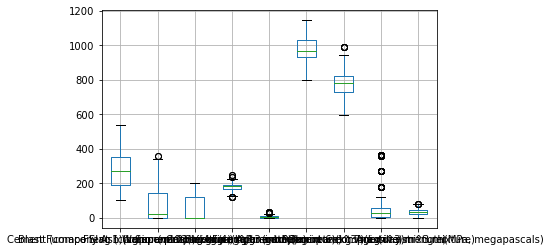

In [4]:
concreate.boxplot()

In [10]:
from pandas import DataFrame, Series
DataFrame.boxplot?

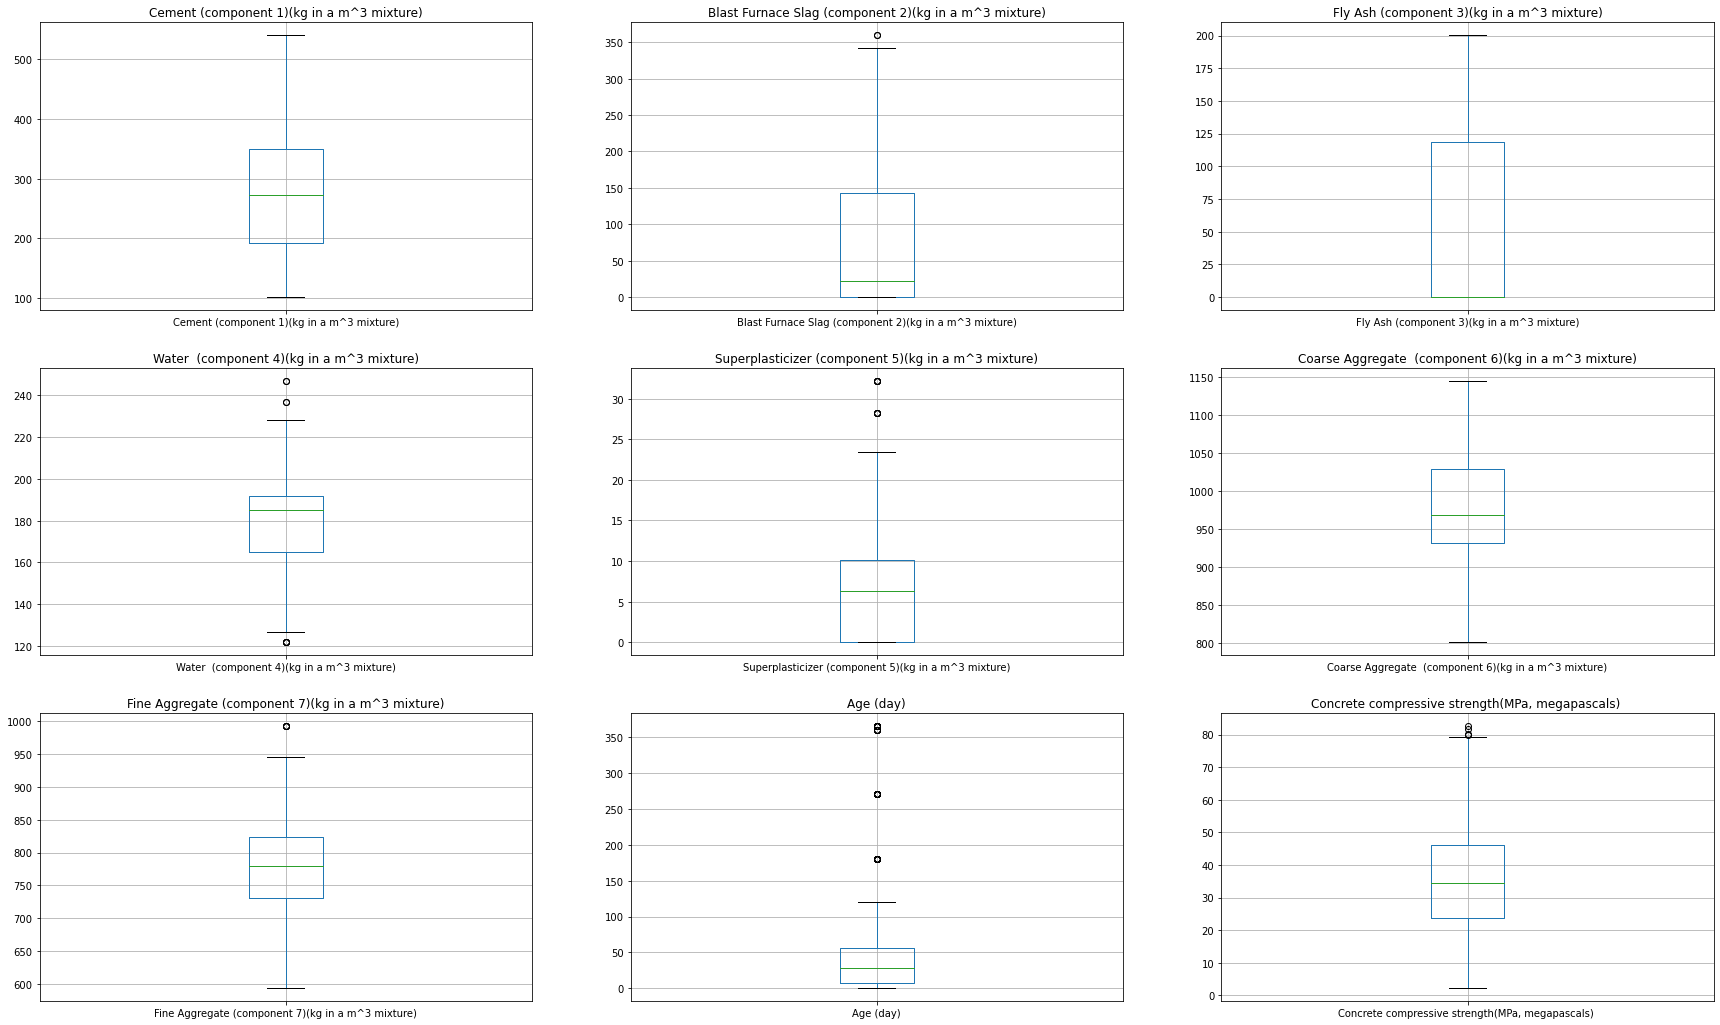

In [7]:
fig, ax = plt.subplots(3, 3,figsize = (30,18))
num_axcolumns = 3

for i, cname in enumerate(concreate.columns):
    
    row_idx = i // num_axcolumns
    col_idx = i % num_axcolumns
    
    concreate[[cname]].boxplot(ax=ax[row_idx, col_idx]) ## 박스플롯에 맞게 
    
    ax[row_idx, col_idx].set_title(cname)
plt.show()

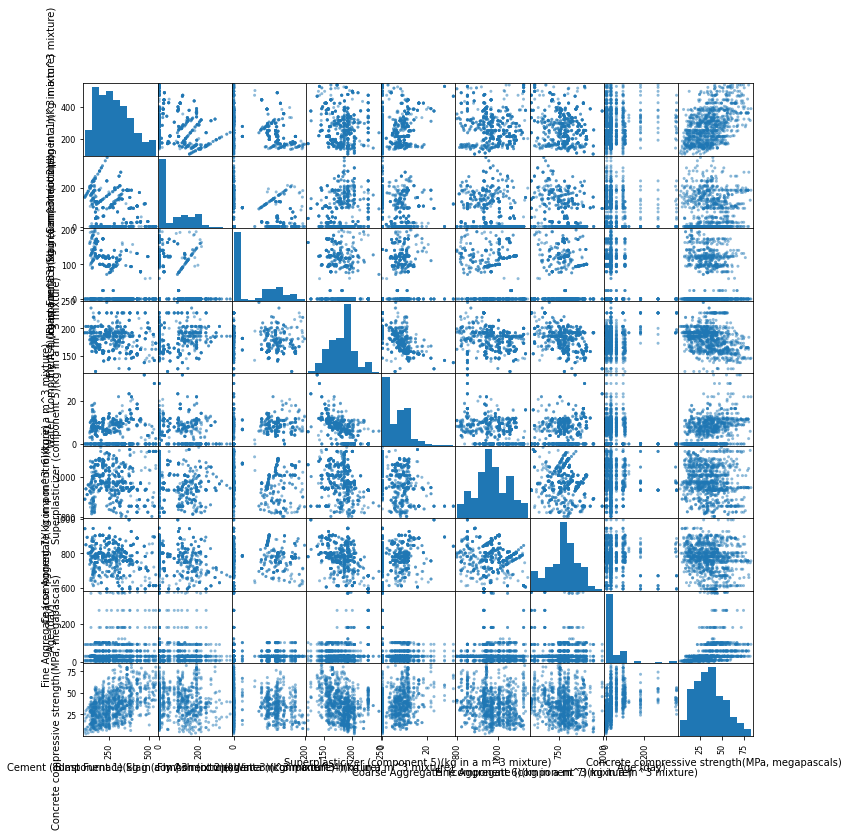

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(concreate, figsize=(12,12))
plt.show()

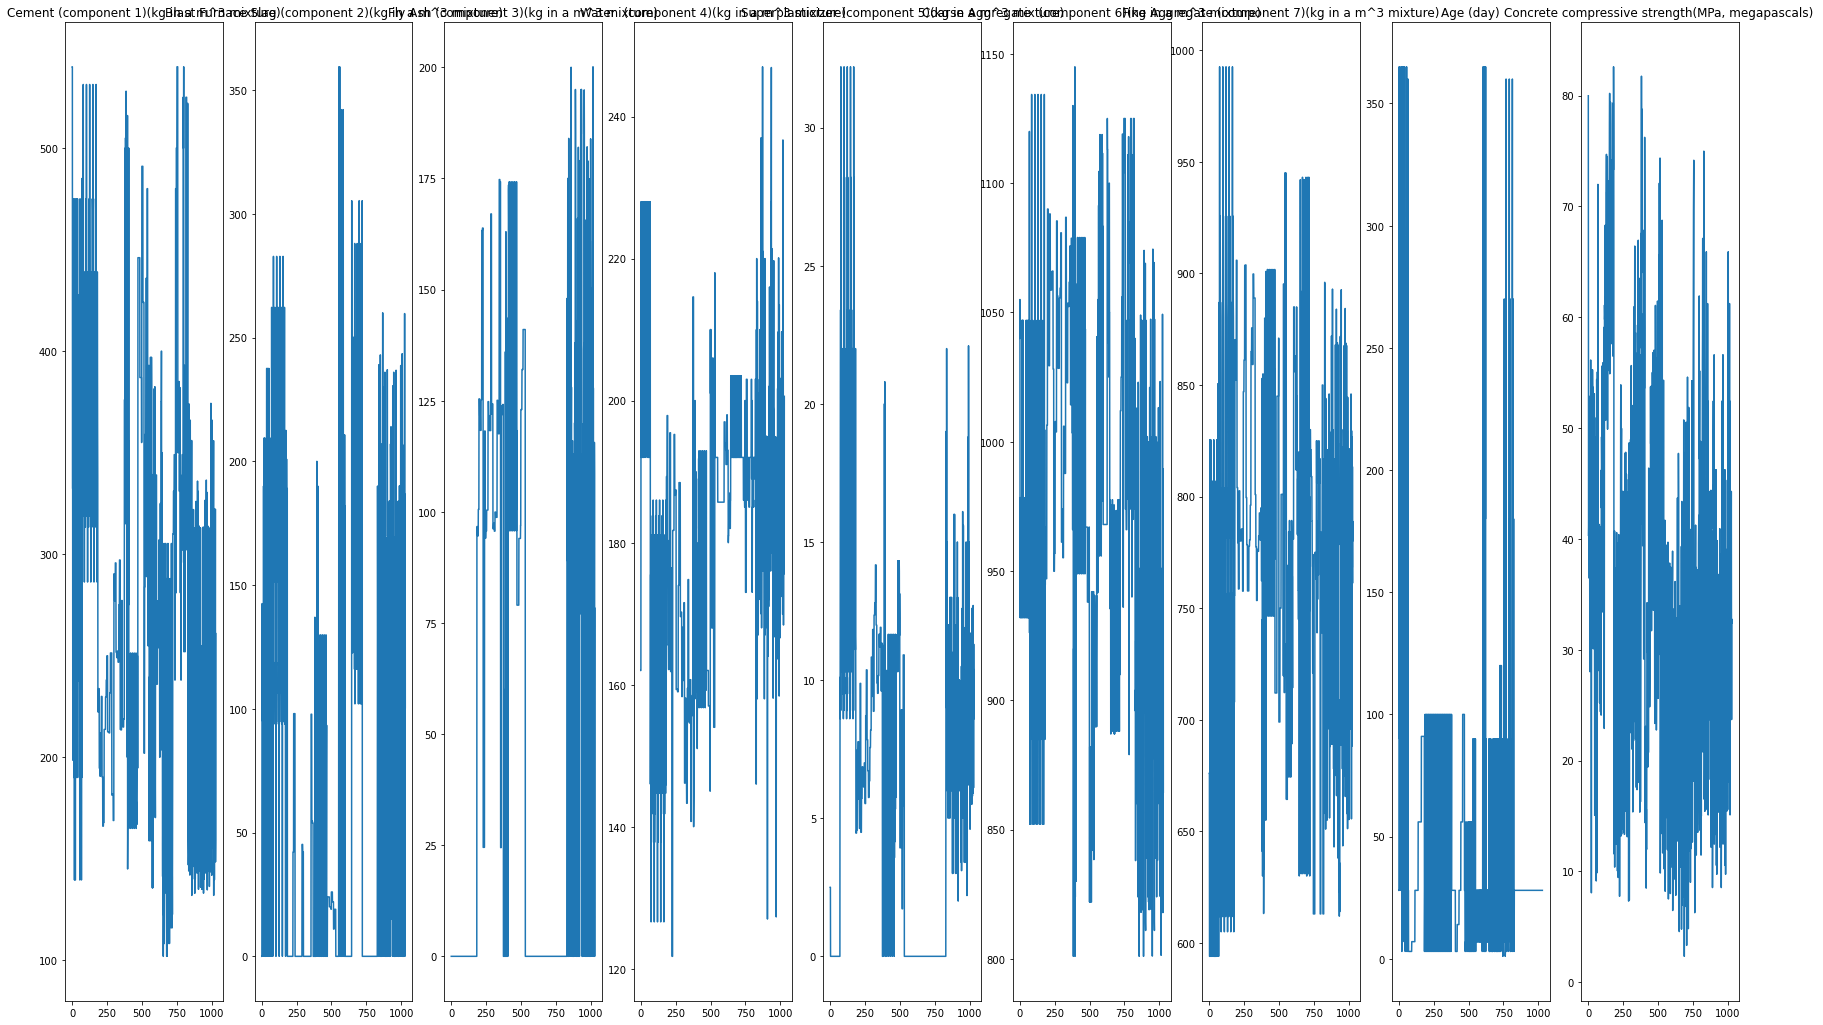

In [6]:
fig, ax = plt.subplots(1,9,figsize = (30,18))
for i, cname in enumerate(concreate.columns):
    concreate[cname].plot(ax=ax[i])
    ax[i].set_title(cname)
plt.show()

(3,3)의 배치로 서브플롯 활용

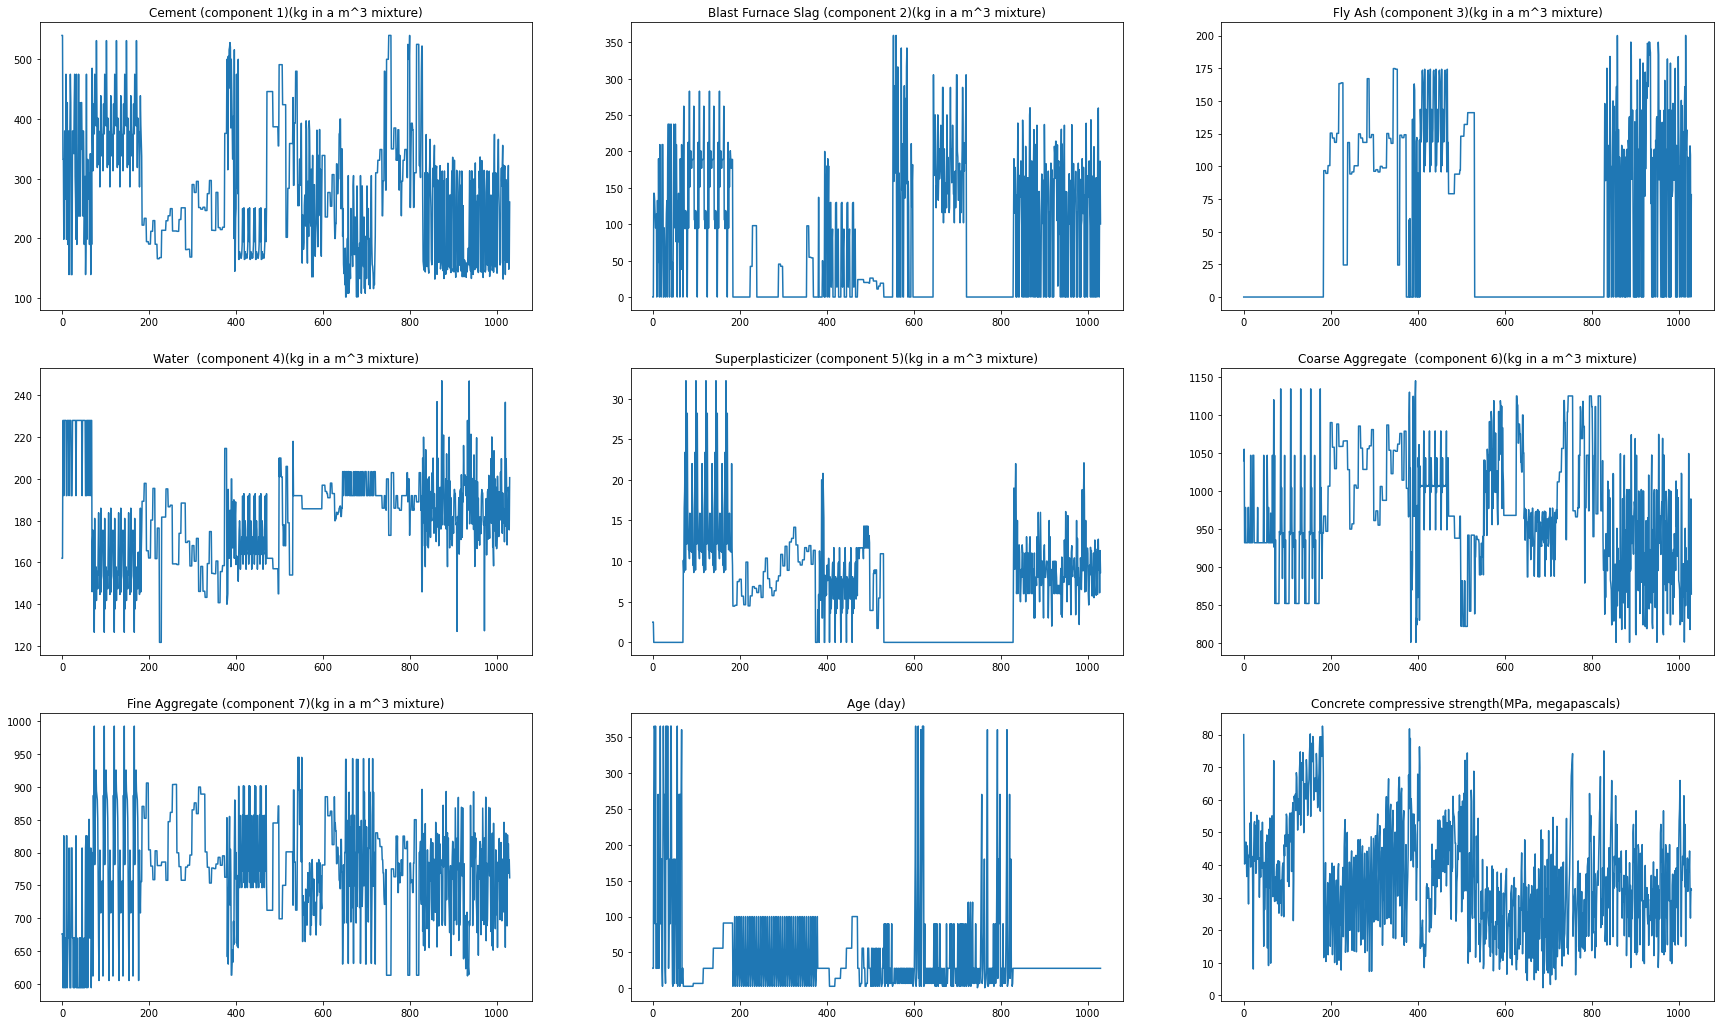

In [14]:
fig, ax = plt.subplots(3, 3,figsize = (30,18))
num_axcolumns = 3

for i, cname in enumerate(concreate.columns):
    
    row_idx = i // num_axcolumns
    col_idx = i % num_axcolumns
    
    concreate[cname].plot(ax=ax[row_idx, col_idx])
    ax[row_idx, col_idx].set_title(cname)
plt.show()

<AxesSubplot:>

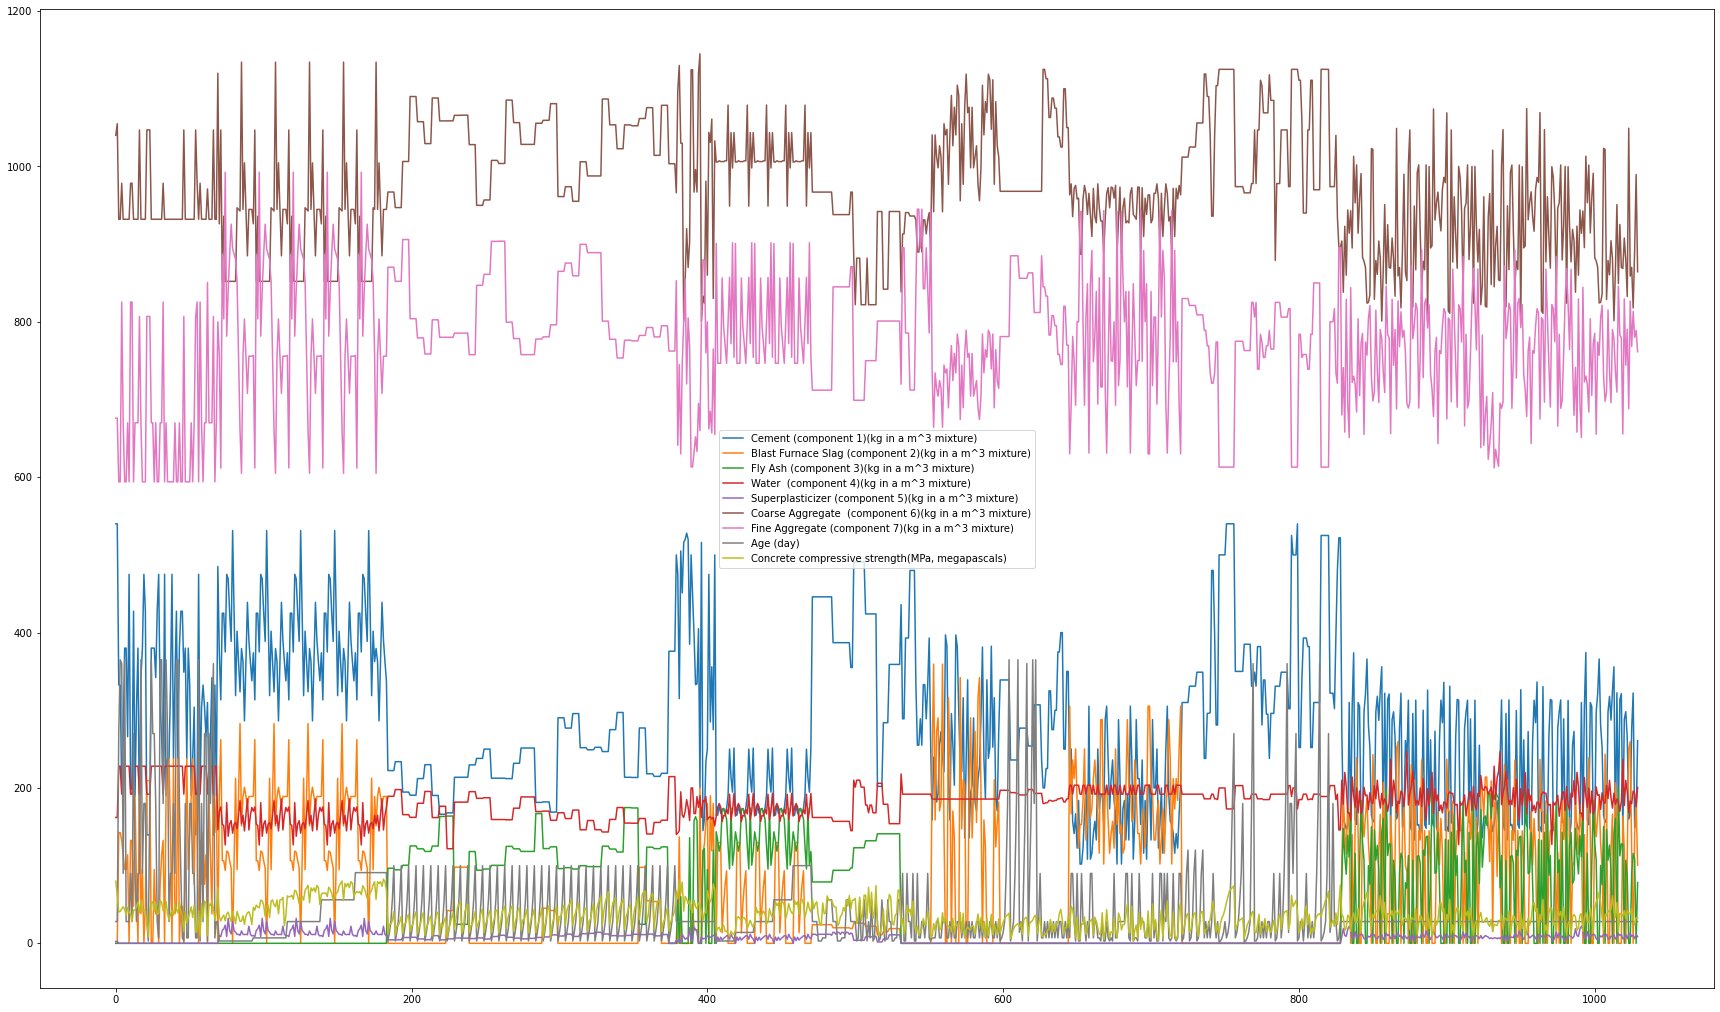

In [9]:
concreate.plot(figsize = (30,18))

array([[<AxesSubplot:title={'center':'Cement (component 1)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Water  (component 4)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Age (day)'}>,
        <AxesSubplot:title={'center':'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

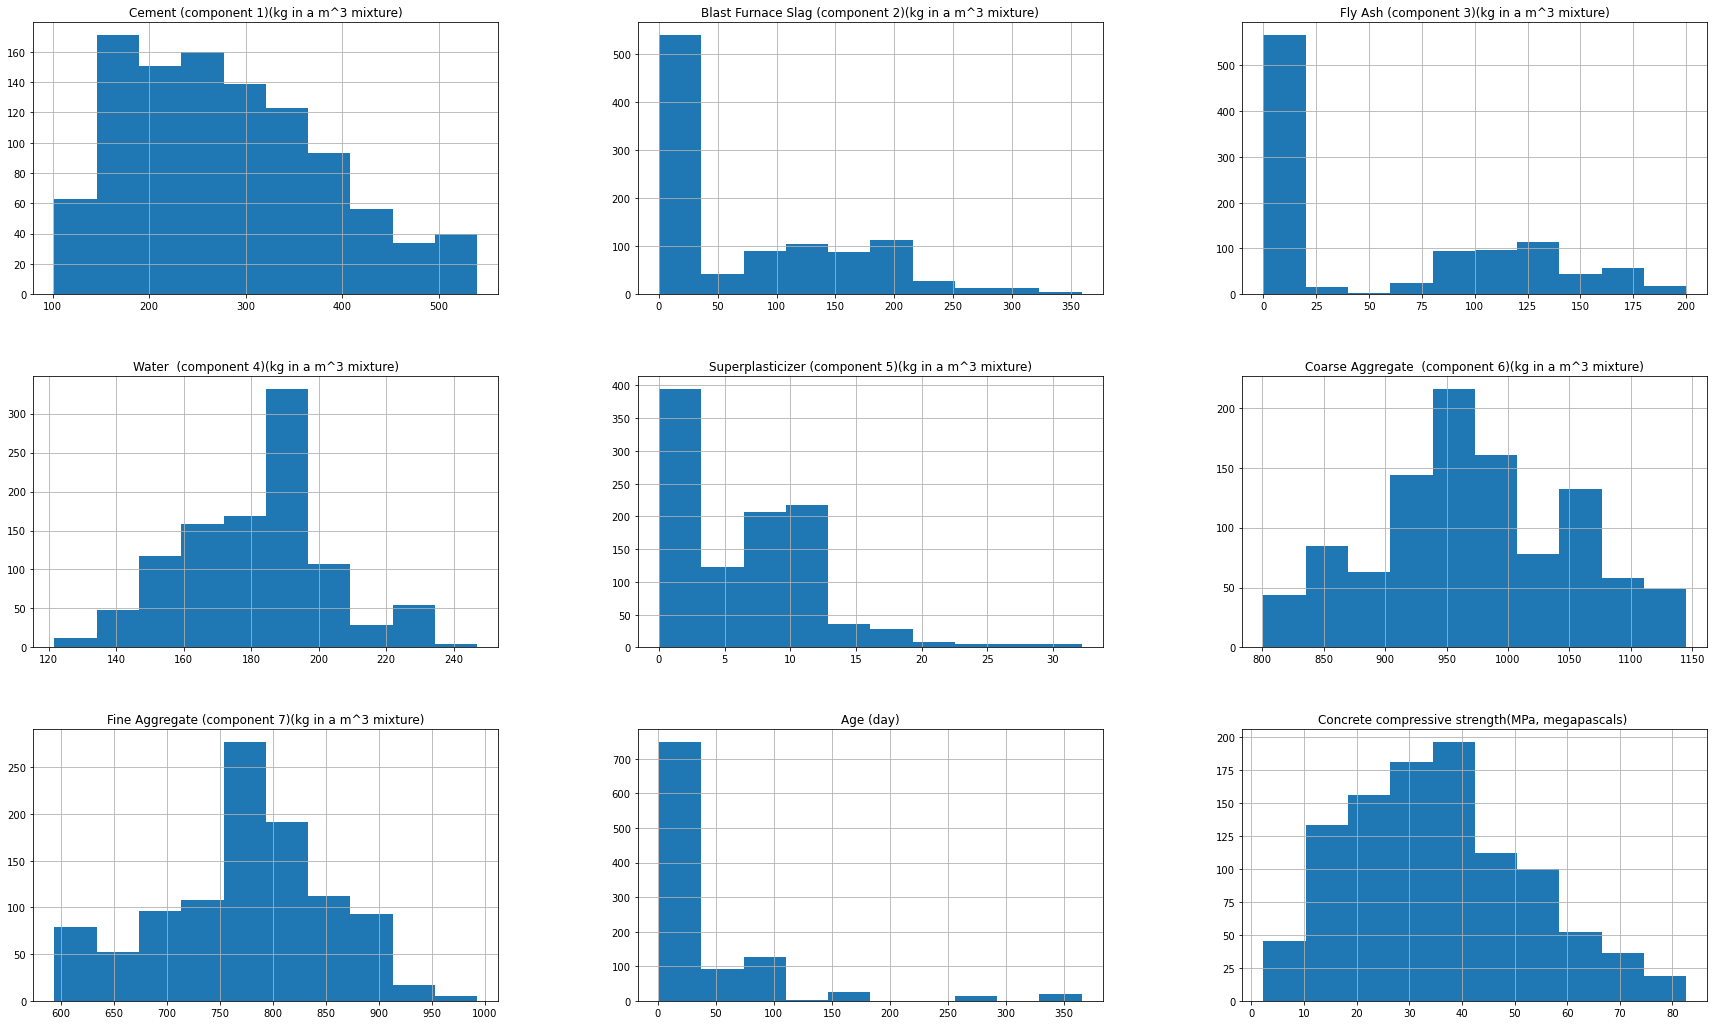

In [13]:
concreate.hist(bins=10,figsize = (30,18))

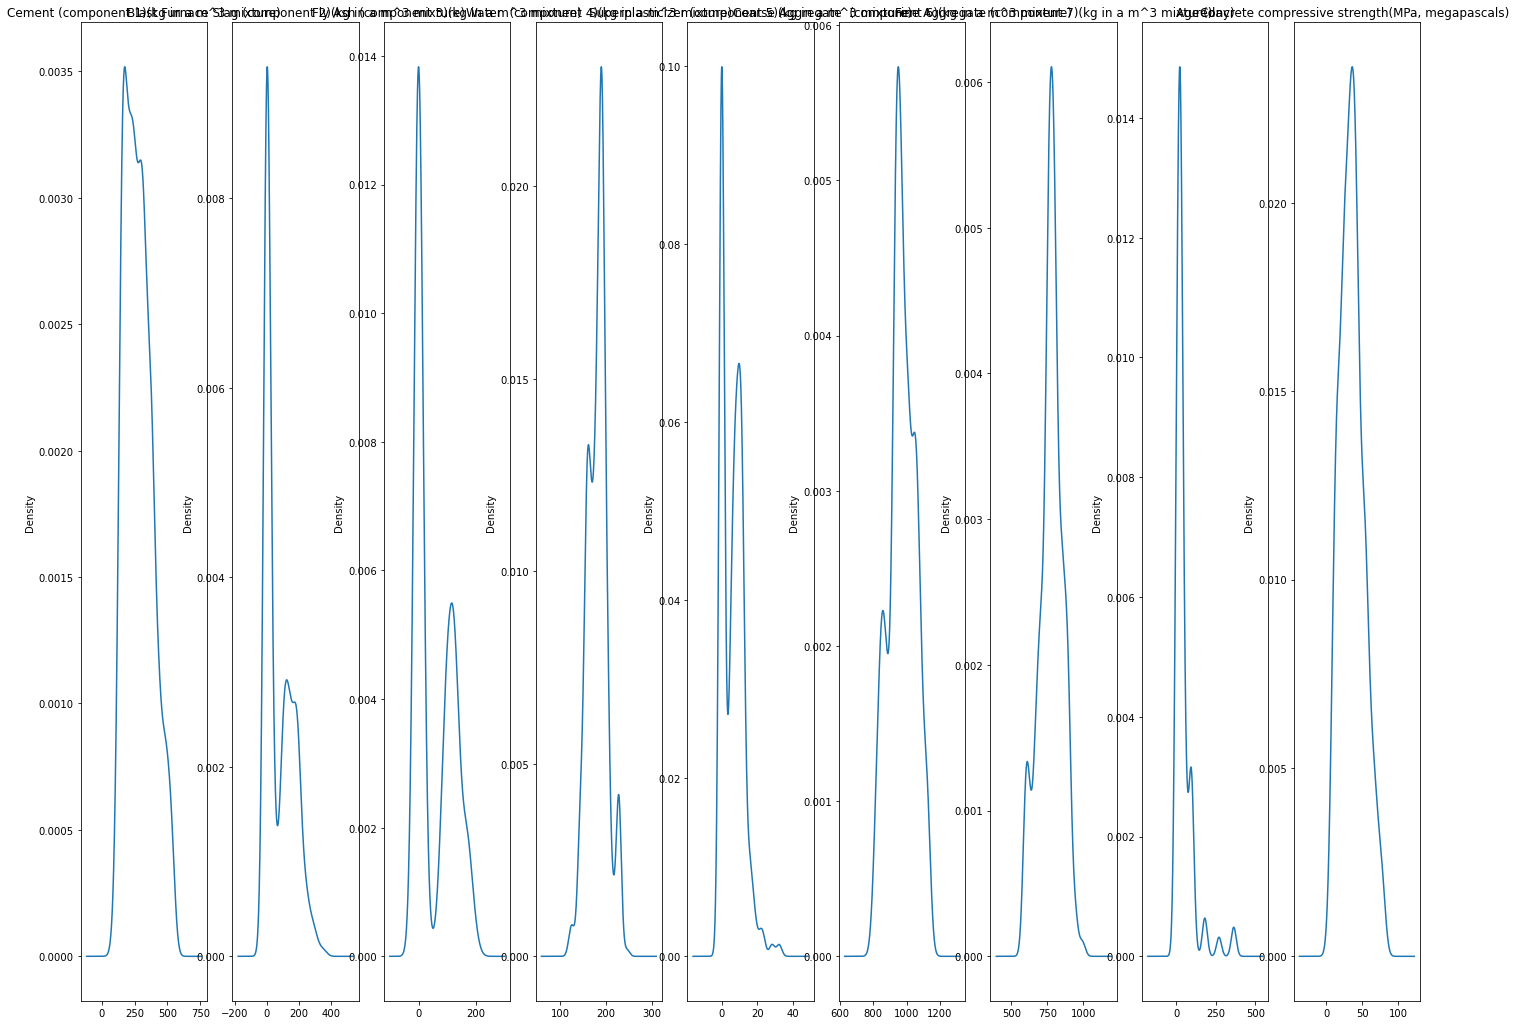

In [18]:
fig, ax = plt.subplots(1,9,figsize = (24,18))
for i, cname in enumerate(concreate.columns):
    concreate[cname].plot.density(ax=ax[i])
    ax[i].set_title(cname)
plt.show()